In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import similarity
import random
import meanCentered as mc
import helper.helper as hp

### PRE-PROCESSING

In [2]:
df = pd.read_csv('../DATA/TOY-DATA/toy.csv')
df

,User,1,2,3,4,5,6
0,1,5,0,4,3,5,4
1,2,4,5,0,3,2,3
2,3,0,3,0,2,1,0
3,4,1,2,2,0,3,4
4,5,1,0,1,2,3,3


In [3]:
df_without_user_column = df.drop(columns=["User"])

In [4]:
matrix = np.array(df_without_user_column).tolist()
matrix

[[5, 0, 4, 3, 5, 4],
 [4, 5, 0, 3, 2, 3],
 [0, 3, 0, 2, 1, 0],
 [1, 2, 2, 0, 3, 4],
 [1, 0, 1, 2, 3, 3]]

In [5]:
meanC = mc.MeanCentered(matrix,opsional=0)

In [6]:
meanC.getMeanListDataFrame()

,0
0,2.750000
1,3.333333
2,2.333333
3,2.500000
4,2.800000
5,3.500000


In [7]:
meanC.getMeanCenteredDataFrame()

,0,1,2,3,4
0,2.250000,1.250000,0.000000,-1.750000,-1.750000
1,0.000000,1.666667,-0.333333,-1.333333,0.000000
2,1.666667,0.000000,0.000000,-0.333333,-1.333333
3,0.500000,0.500000,-0.500000,0.000000,-0.500000
4,2.200000,-0.800000,-1.800000,0.200000,0.200000
5,0.500000,-0.500000,0.000000,0.500000,-0.500000


### PEARSON SIMILARITY MEASURE

In [35]:
similarity_pearson = similarity.Pearson(matrix,opsional=0,k=2)

User Index : 0 Item Index : 1
Similarity : [[1, (0.9622060458243661+0j), (0.9226539095268047+0j), (0.9738516810963534+0j), (0.3860031713602665+0j), (0.14002800840280097+0j)], [(0.9622060458243661+0j), 1, (1+0j), (0.8320502943378437+0j), (-0.23380488239570607+0j), (-0.9938837346736189+0j)], [(0.9226539095268047+0j), (1+0j), 1, (0.9938837346736189+0j), (0.6956532259414017+0j), (0.7126966450997984+0j)], [(0.9738516810963534+0j), (0.8320502943378437+0j), (0.9938837346736189+0j), 1, (0.5068030337996146+0j), (0.33333333333333337+0j)], [(0.3860031713602665+0j), (-0.23380488239570607+0j), (0.6956532259414017+0j), (0.5068030337996146+0j), 1, (0.6361416972599782+0j)], [(0.14002800840280097+0j), (-0.9938837346736189+0j), (0.7126966450997984+0j), (0.33333333333333337+0j), (0.6361416972599782+0j), 1]]
Main Centered : [[2.25, 0.0, 1.6666666666666665, 0.5, 2.2, 0.5], [1.25, 1.6666666666666665, 0.0, 0.5, -0.7999999999999998, -0.5], [0.0, -0.3333333333333335, 0.0, -0.5, -1.7999999999999998, 0.0], [-1.7

In [9]:
similarity_pearson.getMeanListDataFrame()

,0
0,2.750000
1,3.333333
2,2.333333
3,2.500000
4,2.800000
5,3.500000


In [10]:
similarity_pearson.getMeanCenteredDataFrame()

,0,1,2,3,4
0,2.250000,1.250000,0.000000,-1.750000,-1.750000
1,0.000000,1.666667,-0.333333,-1.333333,0.000000
2,1.666667,0.000000,0.000000,-0.333333,-1.333333
3,0.500000,0.500000,-0.500000,0.000000,-0.500000
4,2.200000,-0.800000,-1.800000,0.200000,0.200000
5,0.500000,-0.500000,0.000000,0.500000,-0.500000


In [11]:
similarity_pearson.getSimilarityDataFrame()

,0,1,2,3,4,5
0,1.000000+0.000000j,0.962206+0.000000j,0.922654+0.000000j,0.973852+0.000000j,0.386003+0.000000j,0.140028+0.000000j
1,0.962206+0.000000j,1.000000+0.000000j,1.000000+0.000000j,0.832050+0.000000j,-0.233805+0.000000j,-0.993884+0.000000j
2,0.922654+0.000000j,1.000000+0.000000j,1.000000+0.000000j,0.993884+0.000000j,0.695653+0.000000j,0.712697+0.000000j
3,0.973852+0.000000j,0.832050+0.000000j,0.993884+0.000000j,1.000000+0.000000j,0.506803+0.000000j,0.333333+0.000000j
4,0.386003+0.000000j,-0.233805+0.000000j,0.695653+0.000000j,0.506803+0.000000j,1.000000+0.000000j,0.636142+0.000000j
5,0.140028+0.000000j,-0.993884+0.000000j,0.712697+0.000000j,0.333333+0.000000j,0.636142+0.000000j,1.000000+0.000000j


In [12]:
similarity_pearson.getPredictionDataFrame()

,0,1,2,3,4,5
0,5.000000,4.771806,4.000000,3.000000,5,4.000000
1,4.000000,5.000000,3.418456,3.000000,2,3.000000
2,1.880987,3.000000,2.074042,2.000000,1,2.146977
3,1.000000,2.000000,2.000000,1.465544,3,4.000000
4,1.000000,1.795679,1.000000,2.000000,3,3.000000


In [13]:
similarity_pearson.getPredictionDataFrame()

,0,1,2,3,4,5
0,5.000000,4.771806,4.000000,3.000000,5,4.000000
1,4.000000,5.000000,3.418456,3.000000,2,3.000000
2,1.880987,3.000000,2.074042,2.000000,1,2.146977
3,1.000000,2.000000,2.000000,1.465544,3,4.000000
4,1.000000,1.795679,1.000000,2.000000,3,3.000000


### COSINE SIMILARITY MEASURE

In [14]:
similarity_cosine = similarity.Cosine(matrix,opsional=1,k=2)

User Index : 0 Item Index : 1
Similarity : [[1.        +0.j 0.67356452+0.j 0.3081825 +0.j 0.79102921+0.j
  0.89871703+0.j]
 [0.67356452+0.j 1.        +0.j 0.77445028+0.j 0.69141731+0.j
  0.64293062+0.j]
 [0.3081825 +0.j 0.77445028+0.j 1.        +0.j 0.41251432+0.j
  0.38188131+0.j]
 [0.79102921+0.j 0.69141731+0.j 0.41251432+0.j 1.        +0.j
  0.84016805+0.j]
 [0.89871703+0.j 0.64293062+0.j 0.38188131+0.j 0.84016805+0.j
  1.        +0.j]]
Main Centered : [[0.7999999999999998, 0.6000000000000001, 0.0, -1.4, -1.0], [0.0, 1.6, 1.0, -0.3999999999999999, 0.0], [-0.20000000000000018, 0.0, 0.0, -0.3999999999999999, -1.0], [-1.2000000000000002, -0.3999999999999999, 0.0, 0.0, 0.0], [0.7999999999999998, -1.4, -1.0, 0.6000000000000001, 1.0], [-0.20000000000000018, -0.3999999999999999, 0.0, 1.6, 1.0]]
Similarity[0] : [1.        +0.j 0.67356452+0.j 0.3081825 +0.j 0.79102921+0.j
 0.89871703+0.j]
MeanCentered[1] : [0.0, 1.6, 1.0, -0.3999999999999999, 0.0]
[[0.7910292118262815, 0.6735645239877782], [

In [15]:
similarity_cosine.getMeanListDataFrame()

,0
0,4.2
1,3.4
2,2.0
3,2.4
4,2.0


In [16]:
similarity_cosine.getMeanCenteredDataFrame()

,0,1,2,3,4,5
0,0.8,0.0,-0.2,-1.2,0.8,-0.2
1,0.6,1.6,0.0,-0.4,-1.4,-0.4
2,0.0,1.0,0.0,0.0,-1.0,0.0
3,-1.4,-0.4,-0.4,0.0,0.6,1.6
4,-1.0,0.0,-1.0,0.0,1.0,1.0


In [17]:
similarity_cosine.getSimilarityDataFrame()

,0,1,2,3,4
0,1.000000+0.000000j,0.673565+0.000000j,0.308182+0.000000j,0.791029+0.000000j,0.898717+0.000000j
1,0.673565+0.000000j,1.000000+0.000000j,0.774450+0.000000j,0.691417+0.000000j,0.642931+0.000000j
2,0.308182+0.000000j,0.774450+0.000000j,1.000000+0.000000j,0.412514+0.000000j,0.381881+0.000000j
3,0.791029+0.000000j,0.691417+0.000000j,0.412514+0.000000j,1.000000+0.000000j,0.840168+0.000000j
4,0.898717+0.000000j,0.642931+0.000000j,0.381881+0.000000j,0.840168+0.000000j,1.000000+0.000000j


In [18]:
similarity_cosine.getPredictionDataFrame()

,0,1,2,3,4,5
0,5.000000,4.719797,4.000000,3.000000,5,4.000000
1,4.000000,5.000000,3.098692,3.000000,2,3.000000
2,1.904926,3.000000,1.311568,2.000000,1,2.295074
3,1.000000,2.000000,2.000000,1.818075,3,4.000000
4,1.000000,2.467010,1.000000,2.000000,3,3.000000


### ADJUSTED COSINE SIMILARITY MEASURE

In [19]:
similarity_a_cosine = similarity.ACosine(matrix,opsional=1,k=2)

User Index : 0 Item Index : 1
Similarity : [[1, 0.19850451577276546, -0.9988734992847513, -0.5682823663314001, -0.7385949915952659], [0.19850451577276546, 1, 0.17457169574701567, -0.9304417542122273, -0.7523514371148738], [-0.9988734992847513, 0.17457169574701567, 1, 0.03421419088362375, -0.10934047915289787], [-0.5682823663314001, -0.9304417542122273, 0.03421419088362375, 1, 0.7821258261464551], [-0.7385949915952659, -0.7523514371148738, -0.10934047915289787, 0.7821258261464551, 1]]
Main Centered : [[0.7999999999999998, 0.6000000000000001, 0.0, -1.4, -1.0], [0.0, 1.6, 1.0, -0.3999999999999999, 0.0], [-0.20000000000000018, 0.0, 0.0, -0.3999999999999999, -1.0], [-1.2000000000000002, -0.3999999999999999, 0.0, 0.0, 0.0], [0.7999999999999998, -1.4, -1.0, 0.6000000000000001, 1.0], [-0.20000000000000018, -0.3999999999999999, 0.0, 1.6, 1.0]]
Similarity[0] : [1, 0.19850451577276546, -0.9988734992847513, -0.5682823663314001, -0.7385949915952659]
MeanCentered[1] : [0.0, 1.6, 1.0, -0.399999999999

In [20]:
similarity_a_cosine.getMeanCenteredDataFrame()

,0,1,2,3,4
0,2.250000,1.250000,0.000000,-1.750000,-1.750000
1,0.000000,1.666667,-0.333333,-1.333333,0.000000
2,1.666667,0.000000,0.000000,-0.333333,-1.333333
3,0.500000,0.500000,-0.500000,0.000000,-0.500000
4,2.200000,-0.800000,-1.800000,0.200000,0.200000
5,0.500000,-0.500000,0.000000,0.500000,-0.500000


In [21]:
similarity_a_cosine.getMeanListDataFrame()

,0
0,2.750000
1,3.333333
2,2.333333
3,2.500000
4,2.800000
5,3.500000


In [22]:
similarity_a_cosine.getSimilarityDataFrame()

,0,1,2,3,4
0,1.000000,0.198505,-0.998873,-0.568282,-0.738595
1,0.198505,1.000000,0.174572,-0.930442,-0.752351
2,-0.998873,0.174572,1.000000,0.034214,-0.109340
3,-0.568282,-0.930442,0.034214,1.000000,0.782126
4,-0.738595,-0.752351,-0.109340,0.782126,1.000000


In [23]:
similarity_a_cosine.getPredictionDataFrame()

,0,1,2,3,4,5
0,5.000000,4.910654,4.000000,3.0,5,4.000000
1,4.000000,5.000000,4.149483,3.0,2,3.000000
2,2.272256,3.000000,2.666330,2.0,1,1.927744
3,1.000000,2.000000,2.000000,2.4,3,4.000000
4,1.000000,1.526409,1.000000,2.0,3,3.000000


## BC SIMILARITY MEASRURE

In [24]:
bc = similarity.BC(matrix,opsional=1,k=2)

User Index : 0 Item Index : 1
Similarity : [[1, 0.8485281374238571, 0.2581988897471611, 0.4828427124746191, 0.28284271247461906], [0.8485281374238571, 1, 0.6233472614172718, 0.7656854249492382, 0.6000000000000001], [0.2581988897471611, 0.6233472614172718, 1, 0.8815461511644329, 0.9884956330873825], [0.4828427124746191, 0.7656854249492382, 0.8815461511644329, 1, 0.8485281374238571], [0.28284271247461906, 0.6000000000000001, 0.9884956330873825, 0.8485281374238571, 1]]
Main Centered : [[0.7999999999999998, 0.6000000000000001, 0.0, -1.4, -1.0], [0.0, 1.6, 1.0, -0.3999999999999999, 0.0], [-0.20000000000000018, 0.0, 0.0, -0.3999999999999999, -1.0], [-1.2000000000000002, -0.3999999999999999, 0.0, 0.0, 0.0], [0.7999999999999998, -1.4, -1.0, 0.6000000000000001, 1.0], [-0.20000000000000018, -0.3999999999999999, 0.0, 1.6, 1.0]]
Similarity[0] : [1, 0.8485281374238571, 0.2581988897471611, 0.4828427124746191, 0.28284271247461906]
MeanCentered[1] : [0.0, 1.6, 1.0, -0.3999999999999999, 0.0]
[[0.848528

In [25]:
bc.getSimilarityDataFrame()

,0,1,2,3,4
0,1.000000,0.848528,0.258199,0.482843,0.282843
1,0.848528,1.000000,0.623347,0.765685,0.600000
2,0.258199,0.623347,1.000000,0.881546,0.988496
3,0.482843,0.765685,0.881546,1.000000,0.848528
4,0.282843,0.600000,0.988496,0.848528,1.000000


In [26]:
bc.getPredictionDataFrame()

,0,1,2,3,4,5
0,5.000000,5.074668,4.000000,3.0,5,4.000000
1,4.000000,5.000000,3.105132,3.0,2,3.000000
2,0.811438,3.000000,1.282843,2.0,1,3.282843
3,1.000000,2.000000,2.000000,2.4,3,4.000000
4,1.000000,2.353335,1.000000,2.0,3,3.000000


In [27]:
array = similarity_a_cosine.getSimilarityArray()

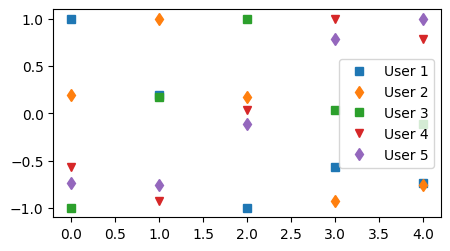

In [28]:
fig, ax = plt.subplots(figsize=(5, 2.7))
shape_draft = ["o","d","v","s"]

shape = [random.choice(shape_draft) for i in range(len(array))]
for i in range(len(array)) :
    ax.plot(array[i], shape[i], label=f'User {i+1}')
ax.legend()

In [29]:
import random

def makeMatrix(m,n) -> list :
    return [[None for j in range(n)]for i in range(m)]

def calculateNumberOfDataSparsity(data:list , sparsityPercent : int) -> list :
    m = len(data)
    n = len(data[0])
    width = n*m
    numberOfSparsity = width*sparsityPercent
    
    for i in range(m) :
        listIndex = [random.randint() for i in range(random.randint(1,m-1))]

def fillMatrix(min:int,max: int,data : list[int] , sparsity : int) -> list :
    result = data
    for dataInner in data:
        for j in range(len(dataInner[0])):
            data[j] = random.randint(min,max)
    return result


In [30]:
a = [[1,2,3,4,1,0]]
print(len(a[0])- a[0].count(0))
print(sum(a[0]))
# print(b.sum())
# print(b[0])
# print(type(int(b[0]+3)))

5
11


In [31]:
pd.DataFrame([
    [
        1,
        0.9553175278133278,
        0.8436614877321075,
        0.887125622400063,
        0.8987170342729172
    ],
    [
        0.9553175278133278,
        1,
        0.997176464952738,
        0.7950463919999252,
        0.8456376143646731
    ],
    [
        0.8436614877321075,
        0.997176464952738,
        1,
        0.7893522173763263,
        0.8682431421244593
    ],
    [
        0.887125622400063,
        0.7950463919999252,
        0.7893522173763263,
        1,
        0.9797958971132711
    ],
    [
        0.8987170342729172,
        0.8456376143646731,
        0.8682431421244593,
        0.9797958971132711,
        1
    ]
])

,0,1,2,3,4
0,1.000000,0.955318,0.843661,0.887126,0.898717
1,0.955318,1.000000,0.997176,0.795046,0.845638
2,0.843661,0.997176,1.000000,0.789352,0.868243
3,0.887126,0.795046,0.789352,1.000000,0.979796
4,0.898717,0.845638,0.868243,0.979796,1.000000
